In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
data =  pd.read_csv("C:/Users/procns/Desktop/인공지능/Homework/HW_2/titanic/titanic.csv", index_col = 0)

In [5]:
train_data = pd.read_csv("C:/Users/procns/Desktop/인공지능/Homework/HW_2/titanic/titanic.csv", index_col = 0)
test_data = pd.read_csv("C:/Users/procns/Desktop/인공지능/Homework/HW_2/titanic/test.csv", index_col = 0)

In [6]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
print('Invalid values in train = {}'.format(train_data.isnull().values.sum()))
train_data.isnull().sum()

Invalid values in train = 866


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
train_data = train_data.drop(['Cabin'], axis =1)
train_data = train_data.dropna(axis = 0)

In [10]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [11]:
print('Invalid values in train = {}'.format(train_data.isnull().values.sum()))

Invalid values in train = 0


In [12]:
print('Invalid values in test = {}'.format(test_data.isnull().values.sum()))
test_data.isnull().sum()

Invalid values in test = 414


Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [13]:
test_data = test_data.drop(['Cabin'], axis =1)
test_data = test_data.dropna(axis = 0)
test_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q
1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S


In [14]:
print('Invalid values in test = {}'.format(test_data.isnull().values.sum()))

Invalid values in test = 0


In [15]:
train_target = pd.DataFrame(train_data.Survived, columns = ['Survived'])
test_target = pd.DataFrame(test_data.Survived, columns = ['Survived'])

In [16]:
train_data = train_data.drop(['Name','Ticket'], axis = 1)
test_data = test_data.drop(['Name','Ticket'], axis = 1)

In [17]:
test_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,0,3,male,34.5,0,0,7.8292,Q
893,1,3,female,47.0,1,0,7.0000,S
894,0,2,male,62.0,0,0,9.6875,Q
895,0,3,male,27.0,0,0,8.6625,S
896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
1301,1,3,female,3.0,1,1,13.7750,S
1303,1,1,female,37.0,1,0,90.0000,Q
1304,1,3,female,28.0,0,0,7.7750,S


In [18]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
train_data['Sex_label(f,m)'] = label.fit_transform(train_data['Sex'])
train_data['Embarked_label(C,Q,S)'] = label.fit_transform(train_data['Embarked'])
train_data = train_data.drop(['Sex'], axis = 1)
train_data = train_data.drop(['Embarked'], axis = 1)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,"Sex_label(f,m)","Embarked_label(C,Q,S)"
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,2
2,1,1,38.0,1,0,71.2833,0,0
3,1,3,26.0,0,0,7.9250,0,2
4,1,1,35.0,1,0,53.1000,0,2
5,0,3,35.0,0,0,8.0500,1,2


In [19]:
label = LabelEncoder()
test_data['Sex_label(f,m)'] = label.fit_transform(test_data['Sex'])
test_data['Embarked_label(C,Q,S)'] = label.fit_transform(test_data['Embarked'])
test_data = test_data.drop(['Sex'], axis = 1)
test_data = test_data.drop(['Embarked'], axis = 1)
test_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,"Sex_label(f,m)","Embarked_label(C,Q,S)"
PassengerId,,,,,,,,
892,0,3,34.5,0,0,7.8292,1,1
893,1,3,47.0,1,0,7.0000,0,2
894,0,2,62.0,0,0,9.6875,1,1
895,0,3,27.0,0,0,8.6625,1,2
896,1,3,22.0,1,1,12.2875,0,2


In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survived               712 non-null    int64  
 1   Pclass                 712 non-null    int64  
 2   Age                    712 non-null    float64
 3   SibSp                  712 non-null    int64  
 4   Parch                  712 non-null    int64  
 5   Fare                   712 non-null    float64
 6   Sex_label(f,m)         712 non-null    int32  
 7   Embarked_label(C,Q,S)  712 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 44.5 KB


In [22]:
test_target

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1301,1
1303,1
1304,1


In [25]:
# Survived를 타겟 레이블로 삼아서 EDA 수행

# 1. Plass 레이블별 갯수 및 차트표시

# 2. 생존자와 사망자 총 숫자 및 차트표시

# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석

# 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN) 수행

Text(0.5, 1.0, 'Pclass count')

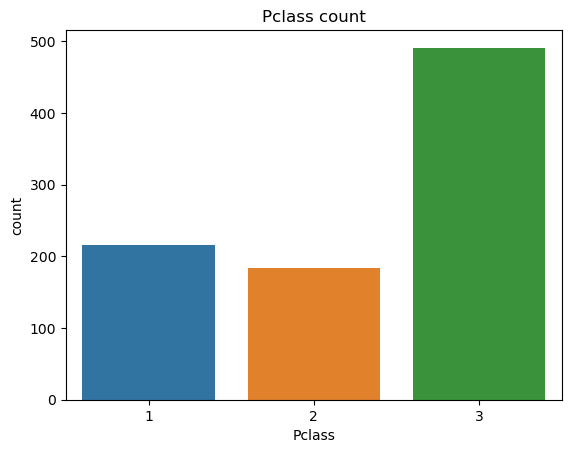

In [26]:
sns.countplot(data = data, x="Pclass")
plt.xlabel("Pclass")
plt.ylabel("count")
plt.title("Pclass count")

Text(0.5, 1.0, 'survived count')

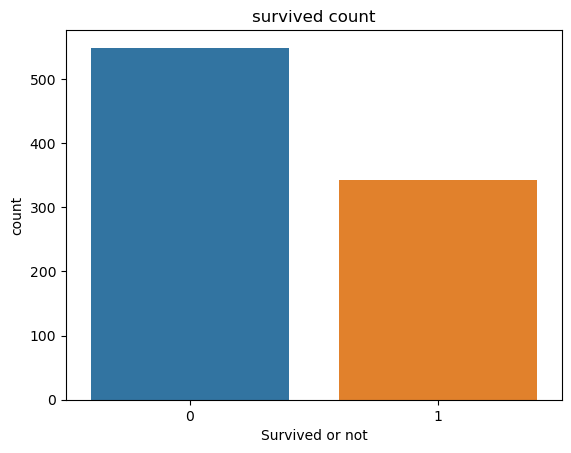

In [27]:
sns.countplot(data = data, x="Survived")
plt.xlabel("Survived or not")
plt.ylabel("count")
plt.title("survived count")

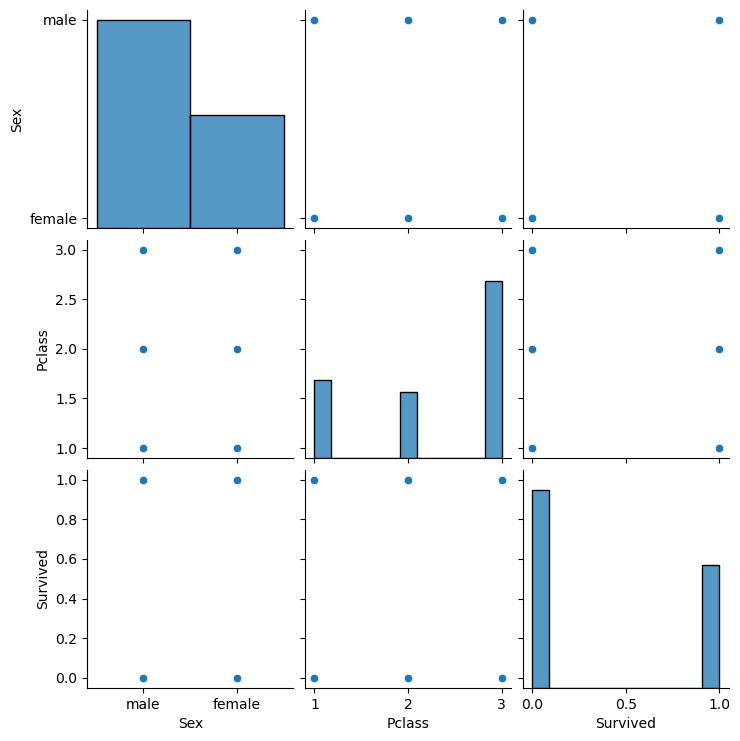

In [30]:
sns.pairplot(data, vars=['Sex', 'Pclass', 'Survived'])
plt.show()

Text(0.5, 1.0, 'Sex_Survived')

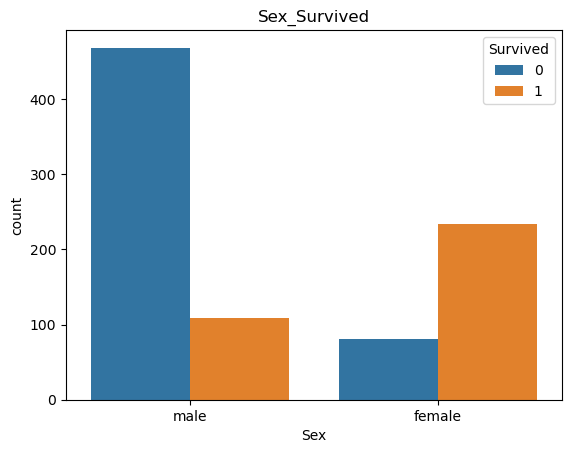

In [31]:
sns.countplot(x="Sex", hue="Survived", data = data)
plt.title("Sex_Survived")

Text(0.5, 1.0, 'Pclass_Survived')

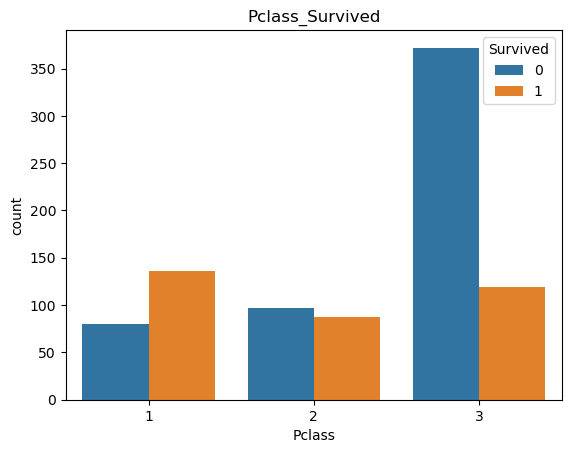

In [32]:
sns.countplot(x="Pclass", hue="Survived", data = data)
plt.title("Pclass_Survived")

Text(0.5, 1.0, 'Sex_Pclass')

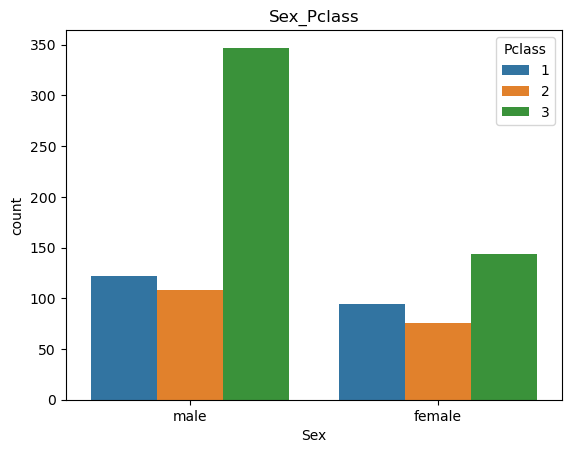

In [33]:
sns.countplot(x="Sex", hue="Pclass", data = data)
plt.title("Sex_Pclass")

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

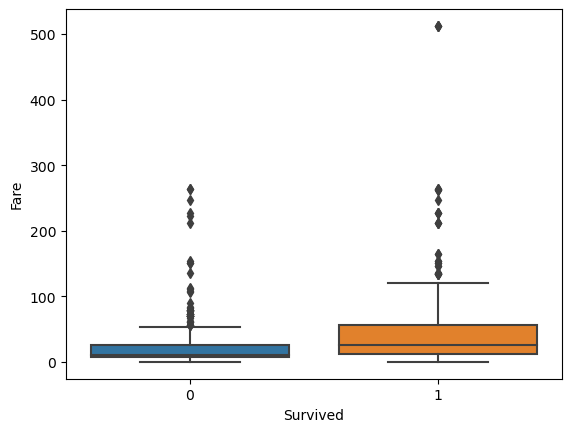

In [34]:
sns.boxplot(x = 'Survived', y = 'Fare', data = data)

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_data)
train_scaled = ss.transform(train_data)
test_scaled = ss.transform(test_data)

In [24]:
train_scaled.shape, train_target.shape, test_scaled.shape, test_target.shape

((712, 8), (712, 1), (331, 8), (331, 1))

In [25]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [29]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(train_scaled, train_target)

pred_svm = clf_svm.predict(test_scaled)

print("\n--- SVM Classifier ---")
print(accuracy_score(test_target, pred_svm))
print(confusion_matrix(test_target, pred_svm))


--- SVM Classifier ---
0.9969788519637462
[[204   0]
 [  1 126]]


C:\Users\procns\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
print ("\n--- KNN ---")
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
pred = kn.predict(test_scaled)
print(accuracy_score(test_target,pred))
print (confusion_matrix(test_target, pred))


--- KNN ---
1.0
[[204   0]
 [  0 127]]


C:\Users\procns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\procns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_scaled, train_target)
pred = rf_clf.predict(test_scaled)
print(accuracy_score(test_target,pred))
print (confusion_matrix(test_target, pred))


--- Radom Forest ---
1.0
[[204   0]
 [  0 127]]


In [32]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(train_scaled, train_target)

pred_lr = clf_lr.predict(test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(test_target, pred_lr))
print (confusion_matrix(test_target, pred_lr))


--- Logistic Regression Classifier ---
1.0
[[204   0]
 [  0 127]]


In [33]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(train_scaled, train_target)

pred_nn = clf_nn.predict(test_scaled)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(test_target, pred_nn))
print (confusion_matrix(test_target, pred_nn))


--- Neural Network Classifier ---
1.0
[[204   0]
 [  0 127]]
